In [1]:
# modules
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
eps = 0.001

f = lambda x: 1/(x**2 - 3*x + 2)

k = np.array(list(range(0, 1001)))
X = np.array(list(map(lambda x: 3*x/1000, k)))

def y(x):
    if f(x) < - 100:
        return -100 + np.random.normal(0, 1)
    elif f(x) > 100:
        return 100 + np.random.normal(0, 1)
    else:
        return f(x) + np.random.normal(0, 1)

Y= np.array([y(x) for i, x in enumerate(X)])

approx = lambda x, a, b, c, d: (a*x + b)/(x**2 + c*x + d)

D = lambda args: sum([(approx(x, *args) - y) ** 2 for x, y in zip(X, Y)])

In [3]:
results = pd.DataFrame()
algs = ['Nelder-Mead', 'Levenberg-Marquardt','Simulated Annealing', 'Differential Evolution']
results['Algorithm name'] = algs
results.set_index('Algorithm name', inplace=True)
results.style.set_caption("Results of approximation")

header_list = ['Number of iters', 'Function min', 'Number of func calculations']
results = results.reindex(columns = header_list) 

# Nelder-Mead

In [4]:
def nelder_mead(f, X, Y):
    result = optimize.minimize(D, np.random.rand(4), method ='nelder-mead', tol=0.001)
    return result

In [5]:
opt_Nelder = nelder_mead(approx, X, Y)

In [6]:
num_of_iterations, func_value, func_count = opt_Nelder.nit, round(opt_Nelder.fun, 3), opt_Nelder.nfev
results.loc[algs[0], :] = [num_of_iterations, func_value, func_count]

Text(0.5, 1.0, 'Nelder-Mead algorithm approximation')

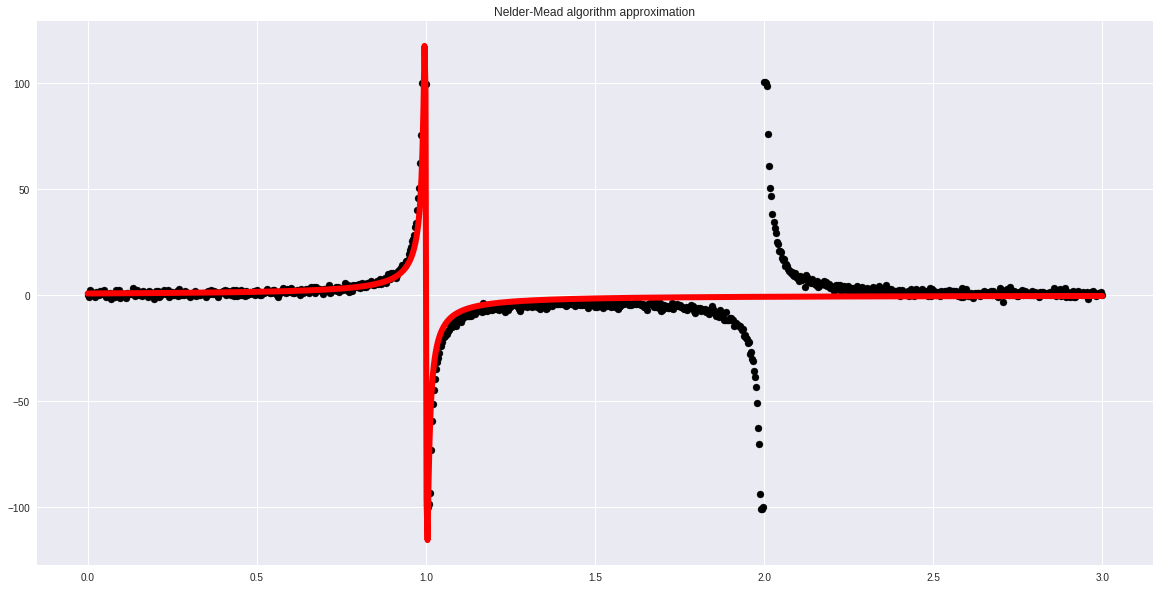

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_Nelder.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Nelder-Mead algorithm approximation')

# Levenberg-Marquardt

In [7]:
approx_corrected = lambda args, x, y: approx(x, *args) - y

In [8]:
opt_LM = optimize.least_squares(approx_corrected, np.random.rand(4), args=(X, Y), method='lm')

In [9]:
num_of_iterations, func_value, func_count = '-', round(D(opt_LM.x), 3), opt_LM.nfev
results.loc[algs[1], :] = [num_of_iterations, func_value, func_count]

Text(0.5, 1.0, 'Levenberg-Marquardt algorithm approximation')

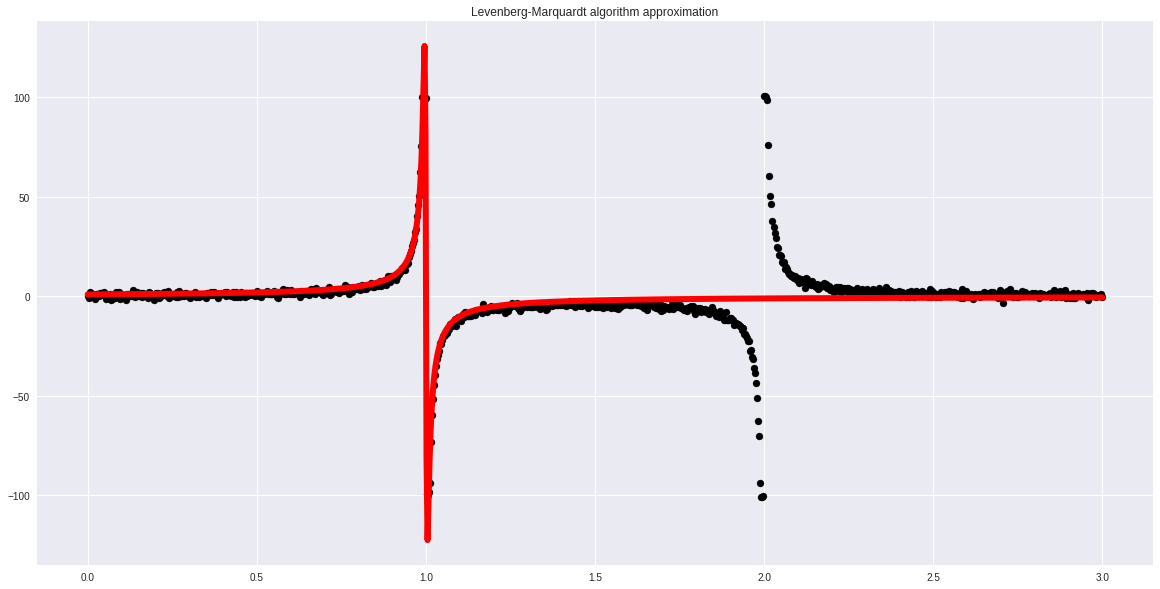

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_LM.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Levenberg-Marquardt algorithm approximation')

# Simulated Annealing

In [10]:
%%time
opt_sim = optimize.dual_annealing(D, bounds=[[-10, 10]] * 4)

CPU times: user 29 s, sys: 153 ms, total: 29.2 s
Wall time: 30.7 s


In [11]:
num_of_iterations, func_value, func_count = opt_sim.nit, round(opt_sim.fun, 3), opt_sim.nfev
results.loc[algs[2], :] = [num_of_iterations, func_value, func_count]

Text(0.5, 1.0, 'Simulated Annealing approximation')

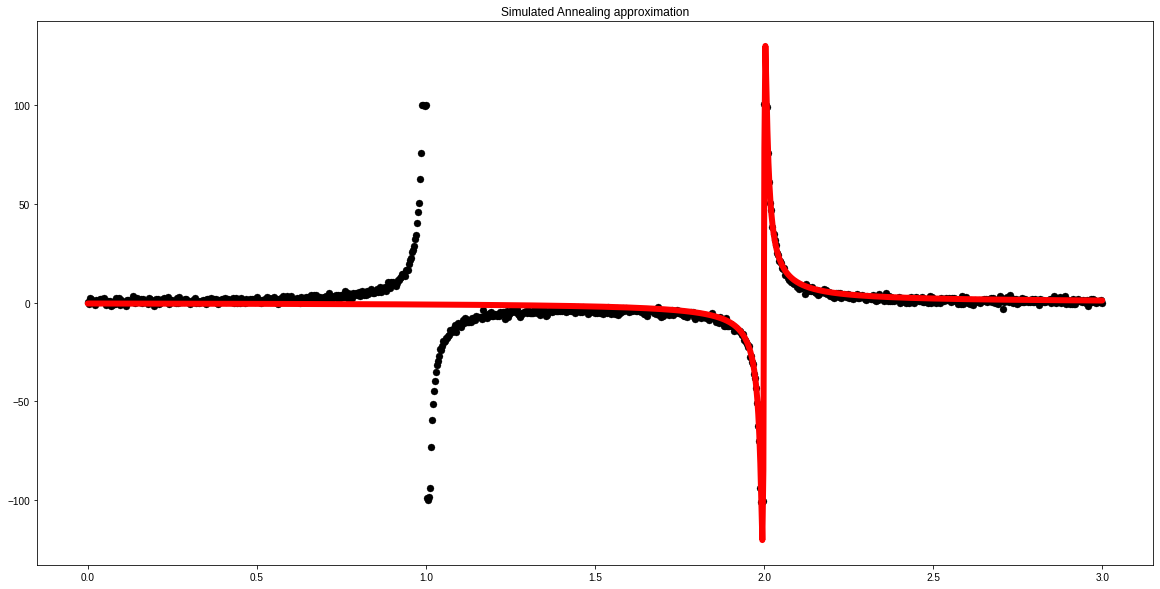

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_sim.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Simulated Annealing approximation')

# Differential Evolution

In [12]:
opt_evol = optimize.differential_evolution(D, bounds=[[-10, 10]] * 4, maxiter=1000)

In [13]:
num_of_iterations, func_value, func_count = opt_evol.nit, round(opt_evol.fun, 3), opt_evol.nfev
results.loc[algs[3], :] = [num_of_iterations, func_value, func_count]

Text(0.5, 1.0, 'Differential evolution algorithm approximation')

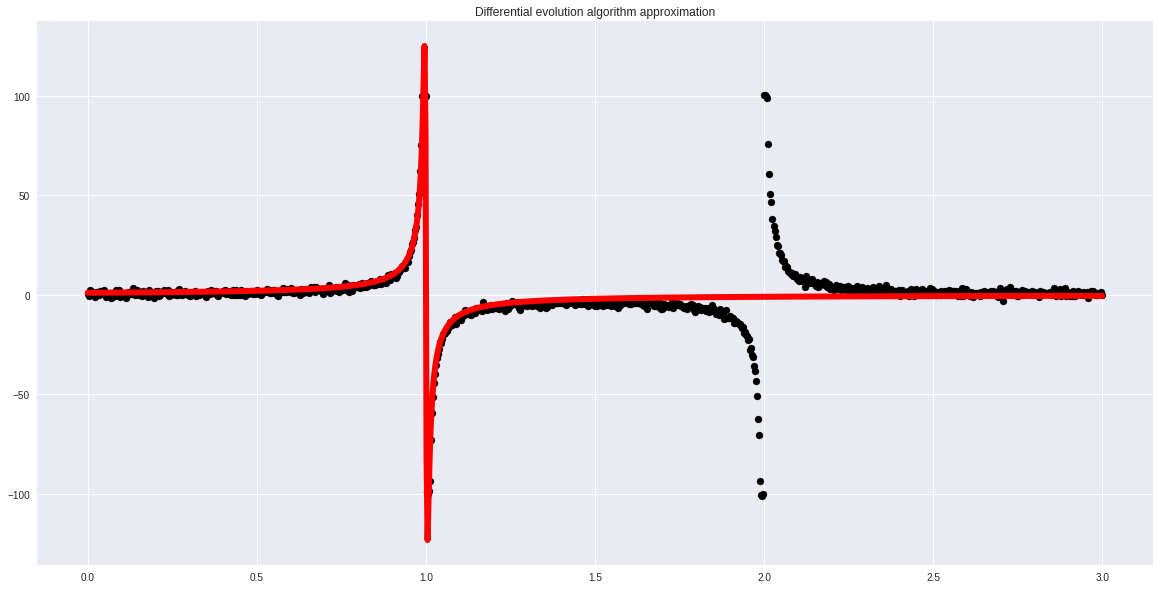

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_evol.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Differential evolution algorithm approximation')


# Results visualization

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_Nelder.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Nelder-Mead algorithm approximation')

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_LM.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Levenberg-Marquardt algorithm approximation')

fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_sim.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Simulated Annealing approximation')

fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('seaborn')
ax.plot(X, [approx(x, *opt_evol.x) for x in X], color='red', linewidth = 6)
ax.scatter(X, Y, color='k')
ax.set_title('Differential evolution algorithm approximation')

fig, ax = plt.subplots(figsize=(20, 10))

Text(0.5, 1.0, 'Approximation results')

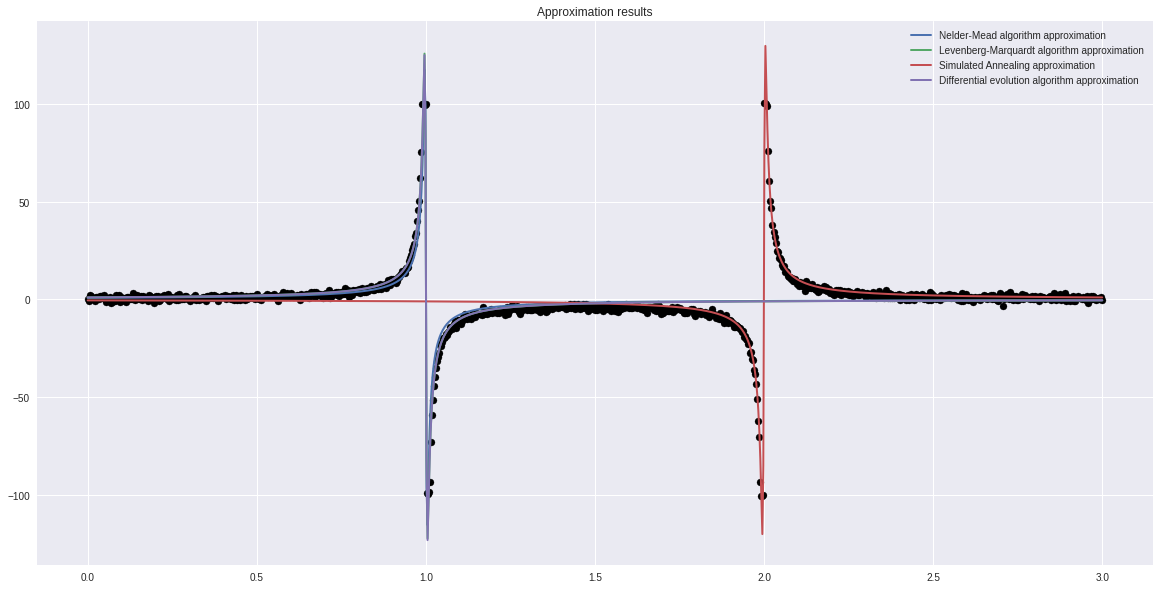

In [35]:
titles = ['Nelder-Mead algorithm approximation', 'Levenberg-Marquardt algorithm approximation', 'Simulated Annealing approximation', 'Differential evolution algorithm approximation']
algorithms = [opt_Nelder, opt_LM, opt_sim, opt_evol]

fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use('seaborn')
ax.scatter(X, Y, color='k')

for title, algorithm in zip(titles, algorithms):
    ax.plot(X, [approx(x, *algorithm.x) for x in X], linewidth = 2, label = title)

ax.legend()
ax.set_title('Approximation results')

# Results

In [ ]:
results

,Number of iters,Function min,Number of func calculations
Algorithm name,,,
Nelder-Mead,238,137849.481,422.0
Levenberg-Marquardt,-,136464.149,131.0
Simulated Annealing,1000,136458.386,9086.0
Differential Evolution,4,136458.389,1140.0


In [ ]:
writer = pd.ExcelWriter('results.xlsx')
results.to_excel(writer)
writer.save()
